In [ ]:
cd /content/drive/MyDrive/CNN

[Errno 2] No such file or directory: '/content/drive/MyDrive/CNN'
/content


In [ ]:
!unzip /content/drive/MyDrive/CNN/Flowers-Dataset.zip

Archive:  /content/drive/MyDrive/CNN/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
flowers_datagen = ImageDataGenerator(rescale= 1./225,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [ ]:
flowers_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
a_flowers = flowers_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN/flowers",target_size=(256, 256),
                                                class_mode='categorical', batch_size=32)

Found 4317 images belonging to 5 classes.


Creat Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),activation = "relu",input_shape = (256,256,3)))

In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(300, activation = "relu"))

In [ ]:
model.add(Dense(300, activation = "relu"))

In [ ]:
model.add(Dense(5,activation="softmax"))

In [ ]:
model.compile(loss = "categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [ ]:
len(a_flowers)

135

In [ ]:
model.fit(a_flowers, epochs= 3,validation_data=a_flowers, steps_per_epoch=len(a_flowers),validation_steps=len(a_flowers) )

Epoch 1/3
135/135 [==============================] - 1400s 10s/step - loss: 3.4793 - accuracy: 0.4369 - val_loss: 0.9702 - val_accuracy: 0.6155
Epoch 2/3
135/135 [==============================] - 427s 3s/step - loss: 0.8834 - accuracy: 0.6574 - val_loss: 0.5379 - val_accuracy: 0.8520
Epoch 3/3
135/135 [==============================] - 495s 4s/step - loss: 0.4235 - accuracy: 0.8638 - val_loss: 0.1833 - val_accuracy: 0.9504


In [ ]:
model.save("flowers.h5")

In [ ]:
#Testing the Model

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
model = load_model("/content/drive/MyDrive/CNN/flowers.h5")

In [ ]:
img = image.load_img("/content/drive/MyDrive/CNN/flowers/rose/4979895172_ca06eba616.jpg",target_size=(256,256))

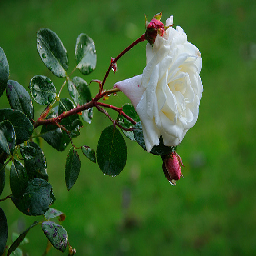

In [ ]:
img

In [ ]:
x = image.img_to_array(img)

In [ ]:
x

array([[[22., 48., 11.],
        [20., 51., 10.],
        [17., 54., 11.],
        ...,
        [43., 82., 29.],
        [40., 80., 27.],
        [39., 78., 23.]],

       [[23., 51., 13.],
        [22., 53., 12.],
        [19., 56., 12.],
        ...,
        [40., 80., 27.],
        [40., 80., 27.],
        [40., 79., 24.]],

       [[19., 51., 10.],
        [20., 56., 12.],
        [22., 58., 12.],
        ...,
        [36., 81., 24.],
        [38., 81., 28.],
        [38., 81., 27.]],

       ...,

       [[ 5., 19.,  2.],
        [ 7., 19.,  5.],
        [ 0., 18.,  4.],
        ...,
        [17., 67.,  6.],
        [22., 68.,  4.],
        [19., 70.,  3.]],

       [[ 4., 19.,  0.],
        [ 6., 18.,  4.],
        [24., 33.,  2.],
        ...,
        [17., 65.,  5.],
        [22., 61.,  4.],
        [20., 64.,  3.]],

       [[ 5., 17.,  5.],
        [18., 32.,  6.],
        [39., 46.,  4.],
        ...,
        [18., 63.,  4.],
        [22., 62.,  2.],
        [23., 65.,  2.]]

In [ ]:
x.ndim

3

In [ ]:
x = np.expand_dims(x,axis= 0)

In [ ]:
x.ndim

4

In [ ]:
pred = model.predict(x)

In [ ]:
pred

array([[2.7875136e-38, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00]], dtype=float32)

In [ ]:
hi = ["daisy","dandelion","rose","sunflower","tulip"]

In [ ]:
np.argmax(pred)

2

In [ ]:
hi[np.argmax(pred)]

'rose'